In [33]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.transform import rotate


cat = img_as_float(io.imread(r'/content/cat_gray.jpg', as_gray=True))
dog = img_as_float(io.imread(r'/content/dog_gray.jpg', as_gray=True))

In [34]:
def plot_spectra(img, title):
    F = np.fft.fft2(img)
    F_shifted = np.fft.fftshift(F)
    mag = np.abs(F_shifted)
    mag_db = 20 * np.log10(mag + 1e-8) #I use this 1e-8 in the expression to avoid taking the logarithm of zero, which is undefined.

    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1,3,1)
    plt.imshow(img, cmap='gray')
    plt.title(f'{title} Image')
    plt.axis('off')

    # Normal magnitude spectrum
    plt.subplot(1,3,2)
    plt.imshow(mag, cmap='hot')
    plt.title(f'{title} Magnitude Spectrum')
    plt.axis('off')

    # dB magnitude spectrum
    plt.subplot(1,3,3)
    plt.imshow(mag_db, cmap='hot')
    plt.title(f'{title} Magnitude Spectrum (dB)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    return F, F_shifted


Original Cat Image Analysis:


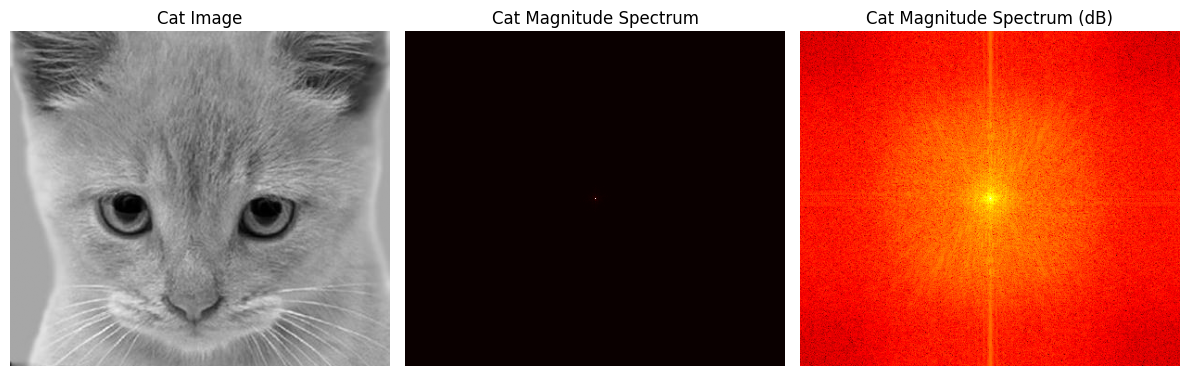

In [35]:
print("Original Cat Image Analysis:")
F_cat, F_cat_shifted = plot_spectra(cat, "Cat")

Original dog Image Analysis:


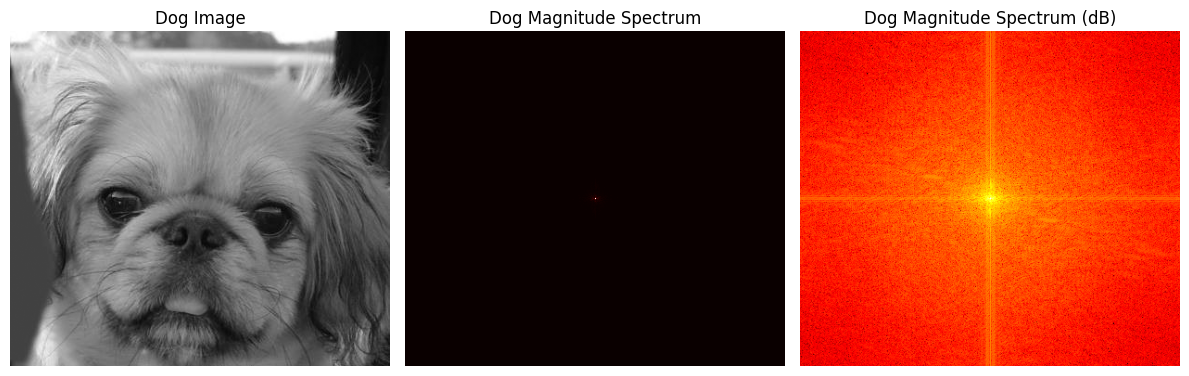

In [36]:
print("Original dog Image Analysis:")
F_dog, F_dog_shifted = plot_spectra(dog, "Dog")

Spectrum Centering Analysis:


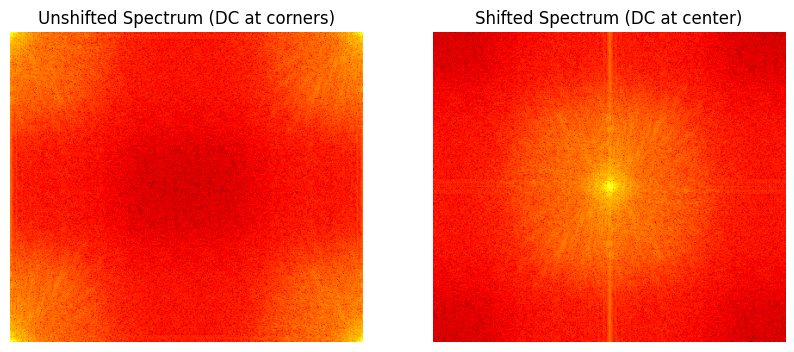

In [37]:
print("Spectrum Centering Analysis:")
F_unshifted = np.fft.fft2(cat)
mag_unshifted = np.abs(F_unshifted)
mag_shifted = np.abs(F_cat_shifted)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(np.log10(mag_unshifted + 1e-8), cmap='hot')
plt.title('Unshifted Spectrum (DC at corners)')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np.log10(mag_shifted + 1e-8), cmap='hot')
plt.title('Shifted Spectrum (DC at center)')
plt.axis('off')
plt.show()


Rotated Image Analysis:


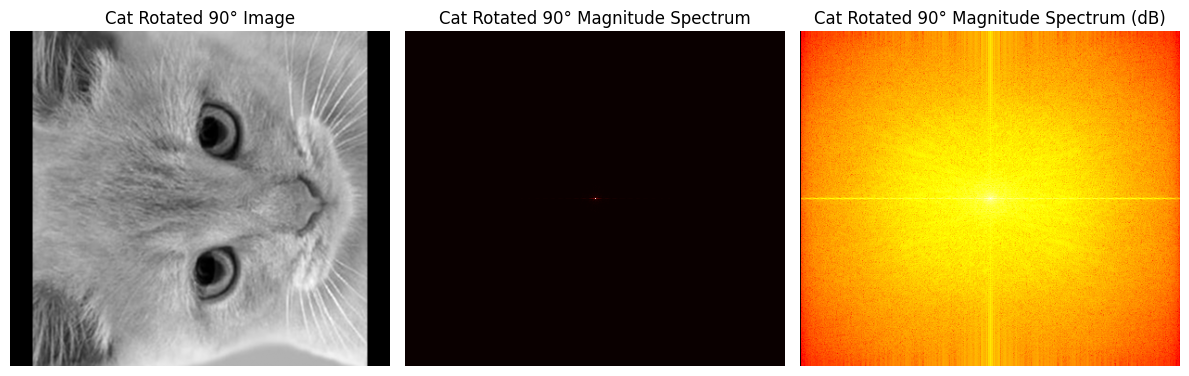

In [38]:
print("Rotated Image Analysis:")
cat_rotated = rotate(cat, 90, resize=False)
F_cat_rot, F_cat_rot_shifted = plot_spectra(cat_rotated, "Cat Rotated 90°")

Rotated Image Analysis:


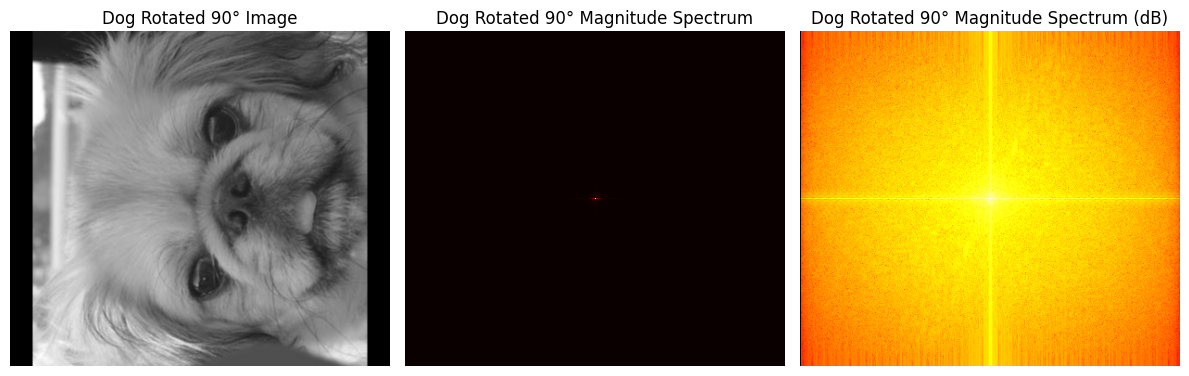

In [39]:
print("Rotated Image Analysis:")
dog_rotated = rotate(dog, 90, resize=False)
F_dog_rot, F_dog_rot_shifted = plot_spectra(dog_rotated, "Dog Rotated 90°")

Spectrum Comparison:


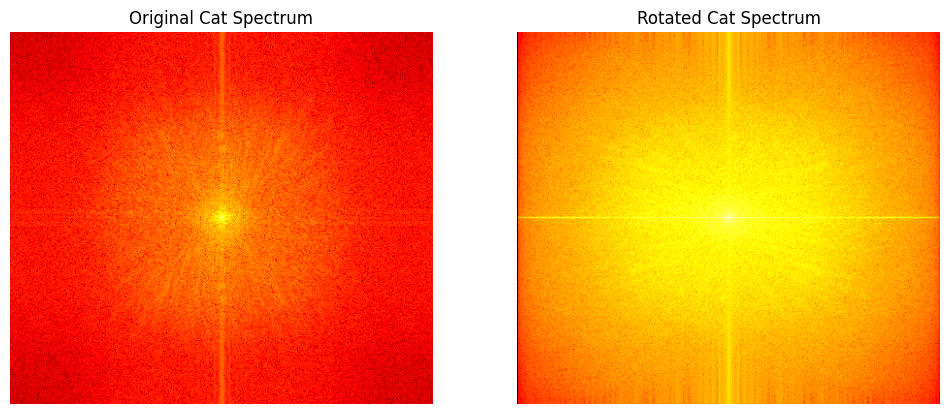

In [40]:
print("Spectrum Comparison:")
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.imshow(np.log10(np.abs(F_cat_shifted) + 1e-8), cmap='hot')
plt.title('Original Cat Spectrum')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np.log10(np.abs(F_cat_rot_shifted) + 1e-8), cmap='hot')
plt.title('Rotated Cat Spectrum')
plt.axis('off')
plt.show()

Spectrum Comparison:


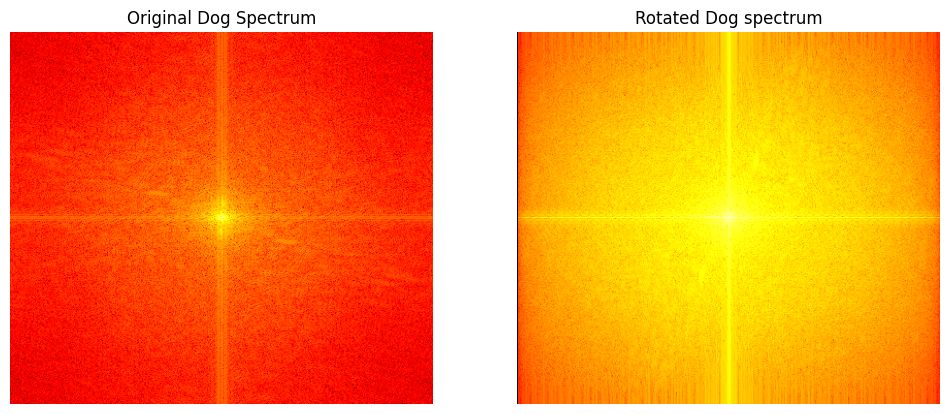

In [41]:
print("Spectrum Comparison:")
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.imshow(np.log10(np.abs(F_dog_shifted) + 1e-8), cmap='hot')
plt.title('Original Dog Spectrum')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np.log10(np.abs(F_dog_rot_shifted) + 1e-8), cmap='hot')
plt.title('Rotated Dog spectrum')
plt.axis('off')
plt.show()

In [46]:
def frequency_mixer(img1, img2, radius=30):
    min_shape = (min(img1.shape[0], img2.shape[0]), min(img1.shape[1], img2.shape[1]))
    img1 = img1[:min_shape[0], :min_shape[1]]
    img2 = img2[:min_shape[0], :min_shape[1]]

    shape = img1.shape
    center = (shape[0]//2, shape[1]//2)
    Y, X = np.ogrid[:shape[0], :shape[1]]
    dist = np.sqrt((X - center[1])**2 + (Y - center[0])**2)

    low_pass_mask = dist <= radius
    high_pass_mask = dist > radius

    F1 = np.fft.fftshift(np.fft.fft2(img1))
    F2 = np.fft.fftshift(np.fft.fft2(img2))

    # Apply filters
    F1_low = F1 * low_pass_mask    # Low frequencies from img1
    F2_high = F2 * high_pass_mask  # High frequencies from img2
    F_fused = F1_low + F2_high

    fused_img = np.fft.ifft2(np.fft.ifftshift(F_fused)).real

    # Plot transfer functions
    plt.figure(figsize=(15, 5))
    plt.subplot(1,3,1)
    plt.imshow(low_pass_mask, cmap='gray')
    plt.title(f"Low-pass Filter (radius={radius})")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(high_pass_mask, cmap='gray')
    plt.title("High-pass Filter")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.plot(np.arange(-shape[1]//2, shape[1]//2),
             low_pass_mask[shape[0]//2, :], 'b-', linewidth=2, label='Low-pass')
    plt.plot(np.arange(-shape[1]//2, shape[1]//2),
             high_pass_mask[shape[0]//2, :], 'r-', linewidth=2, label='High-pass')
    plt.title("Transfer Function Profile")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(20, 8))

    plt.subplot(2,4,1)
    plt.imshow(img1, cmap='gray')
    plt.title("Image 1 (Cat)")
    plt.axis('off')

    plt.subplot(2,4,2)
    plt.imshow(img2, cmap='gray')
    plt.title("Image 2 (Dog)")
    plt.axis('off')

    plt.subplot(2,4,3)
    plt.imshow(fused_img, cmap='gray')
    plt.title("Fused Image")
    plt.axis('off')

    plt.subplot(2,4,4)
    plt.imshow(np.log10(np.abs(F_fused) + 1e-8), cmap='hot')
    plt.title("Fused Spectrum (dB)")
    plt.axis('off')

    plt.subplot(2,4,5)
    plt.imshow(np.log10(np.abs(F1) + 1e-8), cmap='hot')
    plt.title("Cat Spectrum")
    plt.axis('off')

    plt.subplot(2,4,6)
    plt.imshow(np.log10(np.abs(F2) + 1e-8), cmap='hot')
    plt.title("Dog Spectrum")
    plt.axis('off')

    plt.subplot(2,4,7)
    plt.imshow(np.log10(np.abs(F1_low) + 1e-8), cmap='hot')
    plt.title("Low Freq from Cat")
    plt.axis('off')

    plt.subplot(2,4,8)
    plt.imshow(np.log10(np.abs(F2_high) + 1e-8), cmap='hot')
    plt.title("High Freq from Dog")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return fused_img, F_fused


Frequency Mixer Analysis:


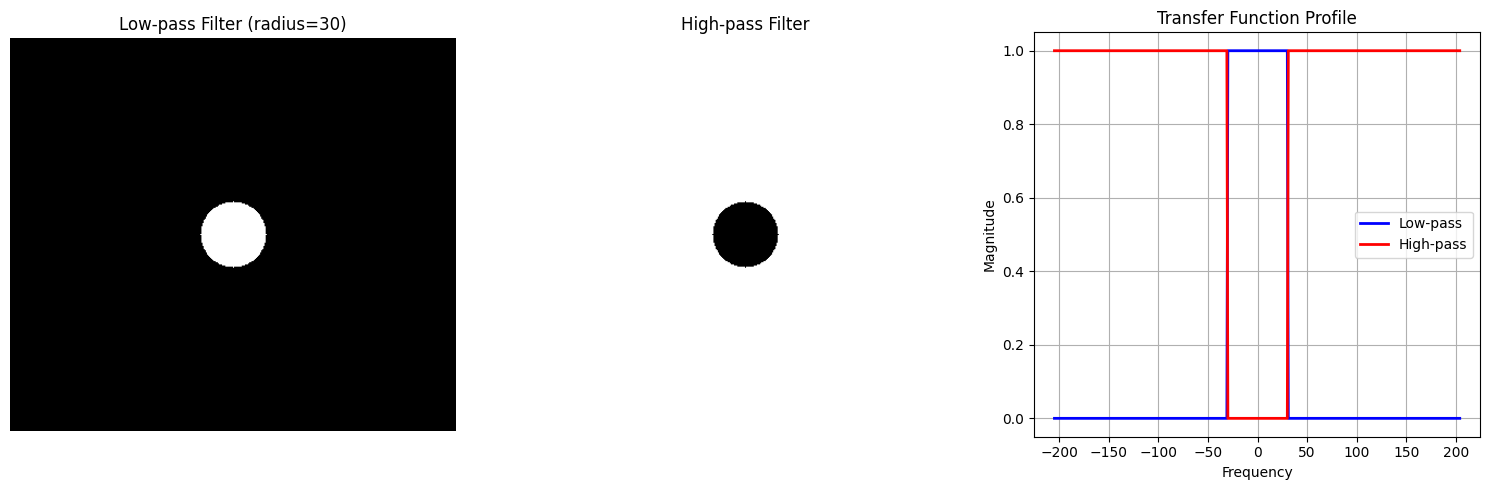

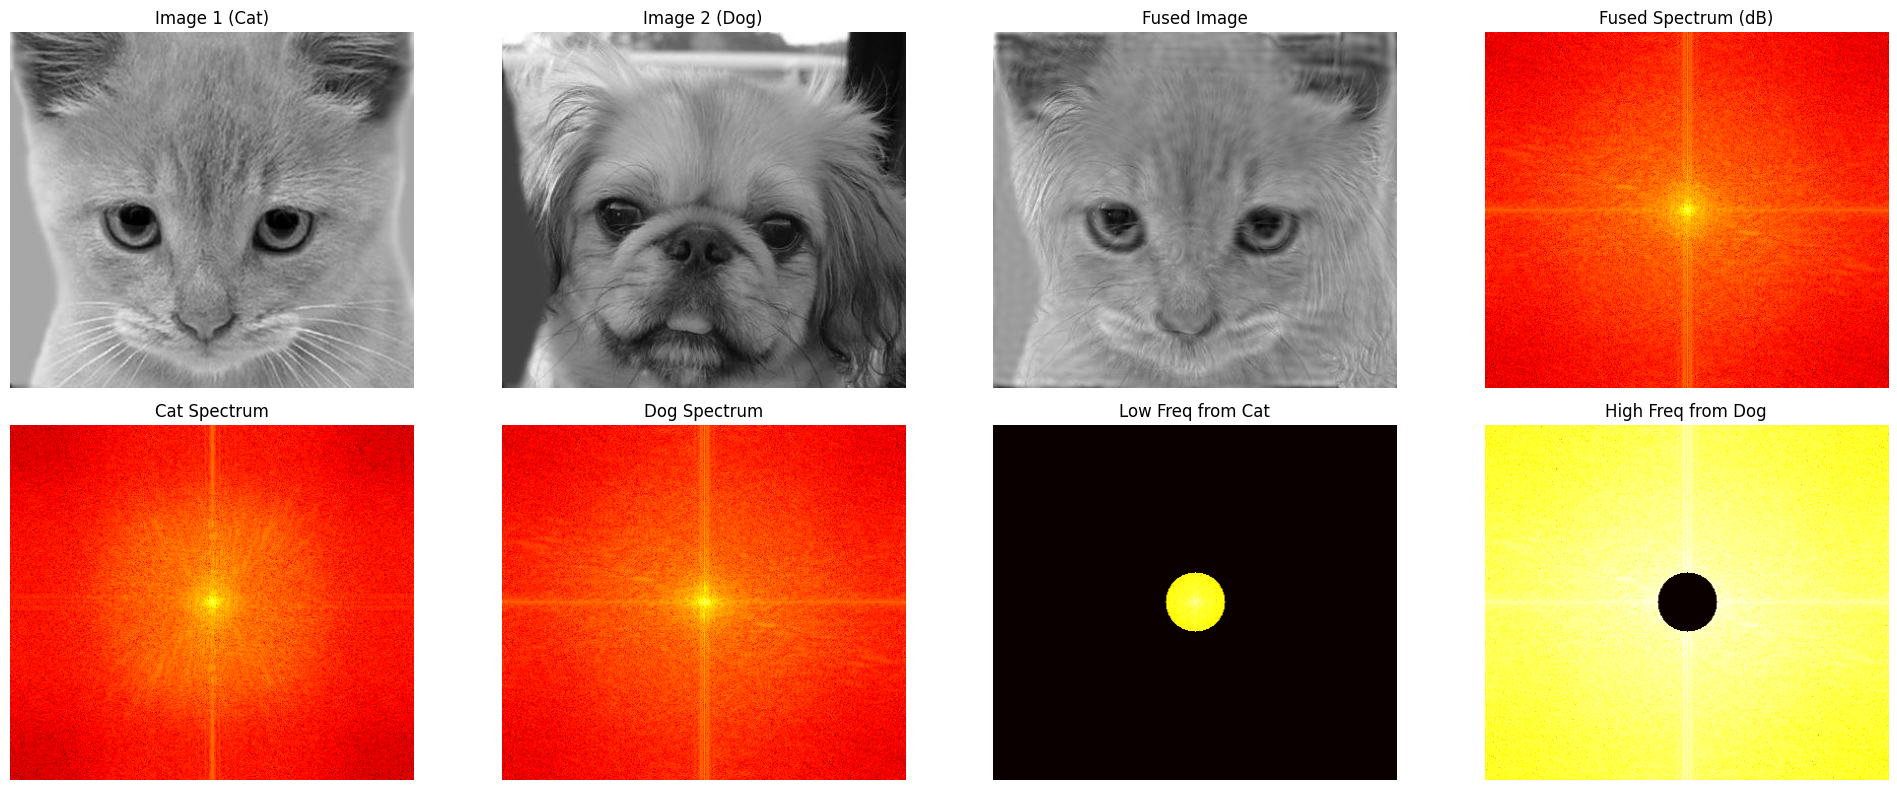

In [47]:
print("Frequency Mixer Analysis:")
fused_image, fused_spectrum = frequency_mixer(cat, dog, radius=30)


Frequency Mixer Analysis:


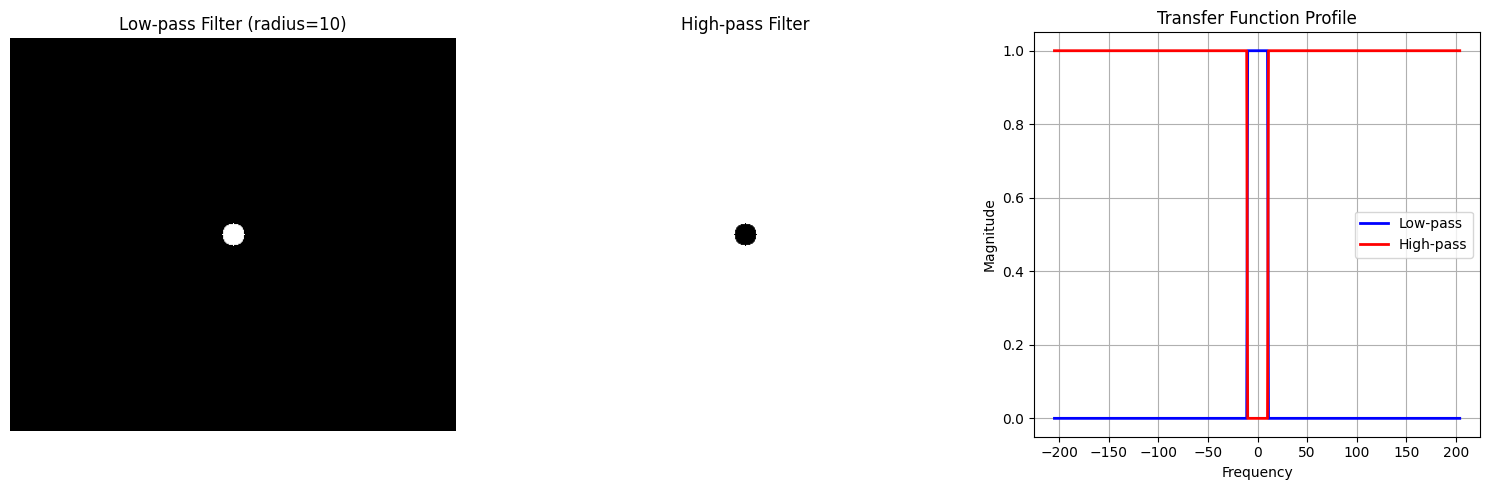

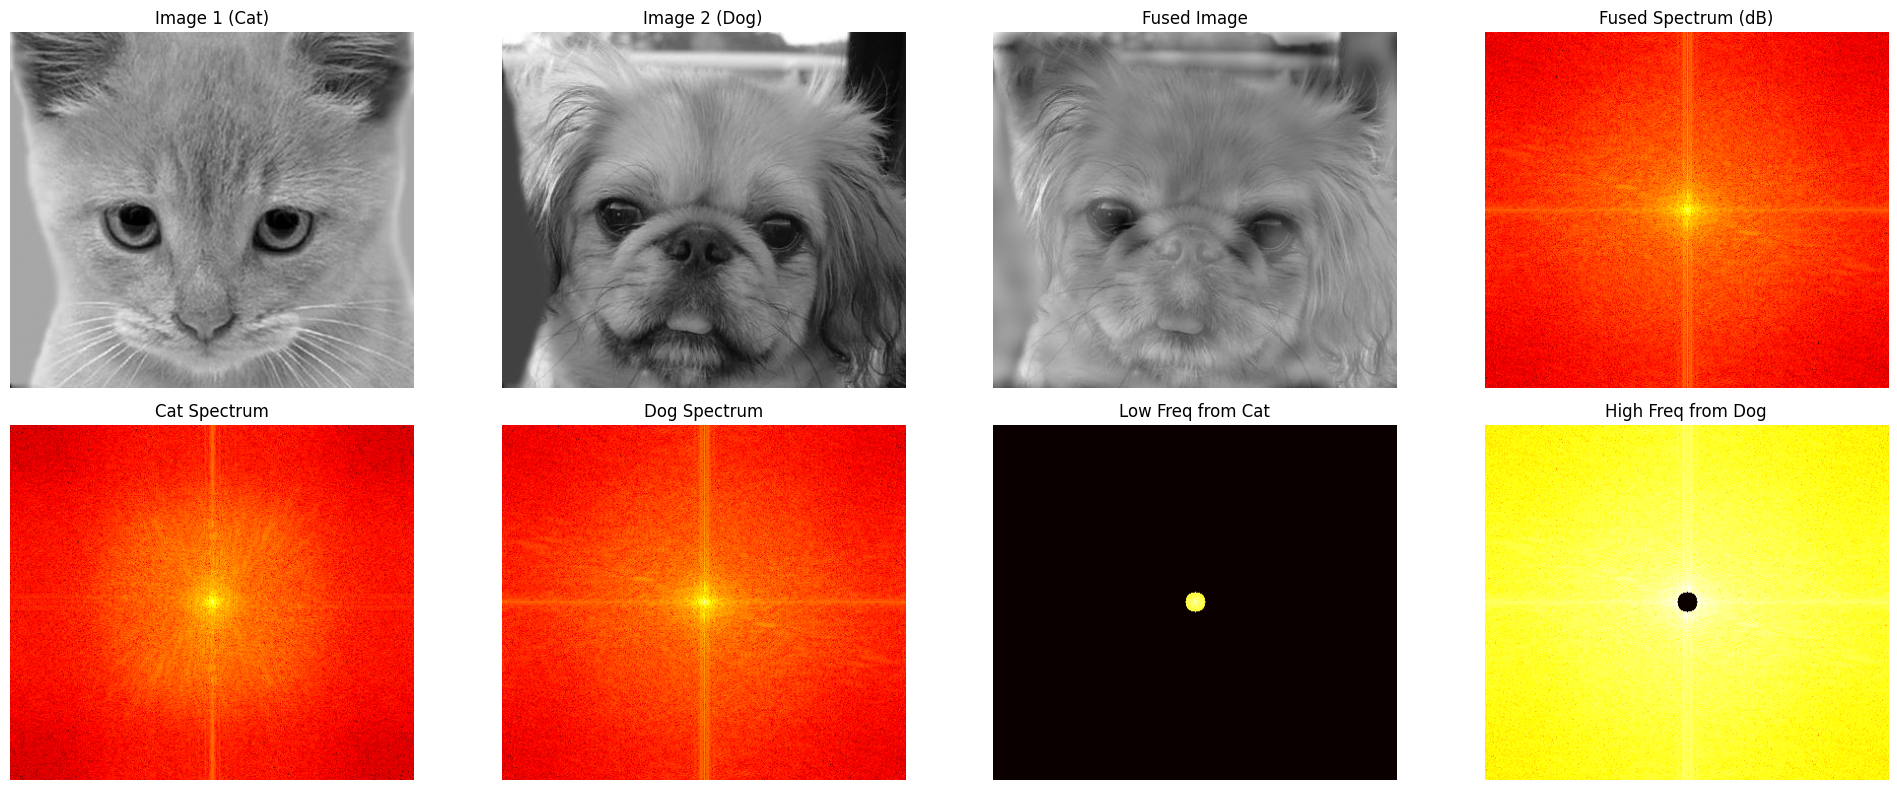

In [44]:
print("Frequency Mixer Analysis:")
fused_image, fused_spectrum = frequency_mixer(cat, dog, radius=10)

In [45]:
print("Observations:")
print("1. The spectrum is centered using fftshift - low frequencies are at the center")
print("2. Rotating the image by 90° also rotates its spectrum by 90°")
print("3. The frequency mixer combines structural info (low freq) from cat with details (high freq) from dog")
print("4. The fused image shows the overall shape/illumination of the cat with fine details from the dog")

Observations:
1. The spectrum is centered using fftshift - low frequencies are at the center
2. Rotating the image by 90° also rotates its spectrum by 90°
3. The frequency mixer combines structural info (low freq) from cat with details (high freq) from dog
4. The fused image shows the overall shape/illumination of the cat with fine details from the dog
